In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('football data.csv')
df

,Name,tackles,interceptions,blocks,goals,assists,KeyPasses
0,Robert Lewandowski,0.6,0.2,-,34,4,1.2
1,Jadon Sancho,0.4,0.4,-,17,16,2.2
2,Timo Werner,0.6,0.1,-,28,8,1.6
3,Alphonso Davies,2.4,1.1,0.2,3,5,1.3
4,Marco Reus,1.4,0.5,0.1,11,5,1.2
...,...,...,...,...,...,...,...
337,Seko Fofana,0.5,0.5,-,3,7,1.5
338,Riccardo Orsolini,1,0.4,-,8,6,1.5
339,Alex Berenguer,0.7,0.6,-,6,2,1.2
340,Arkadiusz Milik,0.5,0.1,-,11,-,0.8


## Data Cleaning
Since the data contains anomaly. "-" is often used to indicate 0. Thus, this anomaly is dealt with here.

In [3]:
df=df.replace('-',0,regex=True)

In [4]:
df

,Name,tackles,interceptions,blocks,goals,assists,KeyPasses
0,Robert Lewandowski,0.6,0.2,0,34,4,1.2
1,Jadon Sancho,0.4,0.4,0,17,16,2.2
2,Timo Werner,0.6,0.1,0,28,8,1.6
3,Alphonso Davies,2.4,1.1,0.2,3,5,1.3
4,Marco Reus,1.4,0.5,0.1,11,5,1.2
...,...,...,...,...,...,...,...
337,Seko Fofana,0.5,0.5,0,3,7,1.5
338,Riccardo Orsolini,1,0.4,0,8,6,1.5
339,Alex Berenguer,0.7,0.6,0,6,2,1.2
340,Arkadiusz Milik,0.5,0.1,0,11,0,0.8


In [5]:
df.isna().sum()

Name             0
tackles          1
interceptions    1
blocks           1
goals            1
assists          1
KeyPasses        1
dtype: int64

In [6]:
df = df.drop(341)
df

,Name,tackles,interceptions,blocks,goals,assists,KeyPasses
0,Robert Lewandowski,0.6,0.2,0,34,4,1.2
1,Jadon Sancho,0.4,0.4,0,17,16,2.2
2,Timo Werner,0.6,0.1,0,28,8,1.6
3,Alphonso Davies,2.4,1.1,0.2,3,5,1.3
4,Marco Reus,1.4,0.5,0.1,11,5,1.2
...,...,...,...,...,...,...,...
336,Marten de Roon,2.2,1.3,0.2,2,5,1
337,Seko Fofana,0.5,0.5,0,3,7,1.5
338,Riccardo Orsolini,1,0.4,0,8,6,1.5
339,Alex Berenguer,0.7,0.6,0,6,2,1.2


## Principal Component Analysis(PCA)

First we have to scale the data so that PCA can be performed on it.

In [7]:
new_df = df[['tackles', 'interceptions', 'blocks', 'goals', 'assists',
       'KeyPasses']]
new_df

,tackles,interceptions,blocks,goals,assists,KeyPasses
0,0.6,0.2,0,34,4,1.2
1,0.4,0.4,0,17,16,2.2
2,0.6,0.1,0,28,8,1.6
3,2.4,1.1,0.2,3,5,1.3
4,1.4,0.5,0.1,11,5,1.2
...,...,...,...,...,...,...
336,2.2,1.3,0.2,2,5,1
337,0.5,0.5,0,3,7,1.5
338,1,0.4,0,8,6,1.5
339,0.7,0.6,0,6,2,1.2


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(new_df)

StandardScaler()

In [10]:
scaled_data = scaler.transform(new_df)

Now, implementing PCA.

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #n_components means the number of features you want to have

In [12]:
pca.fit(scaled_data)

PCA(n_components=2)

In [13]:
x_pca = pca.transform(scaled_data)

In [14]:
scaled_data.shape

(341, 6)

In [15]:
x_pca.shape

(341, 2)

Now, we have reduced the number of features from 6 to 2. Lets visualise them now.

Text(0, 0.5, 'Second Principal Component')

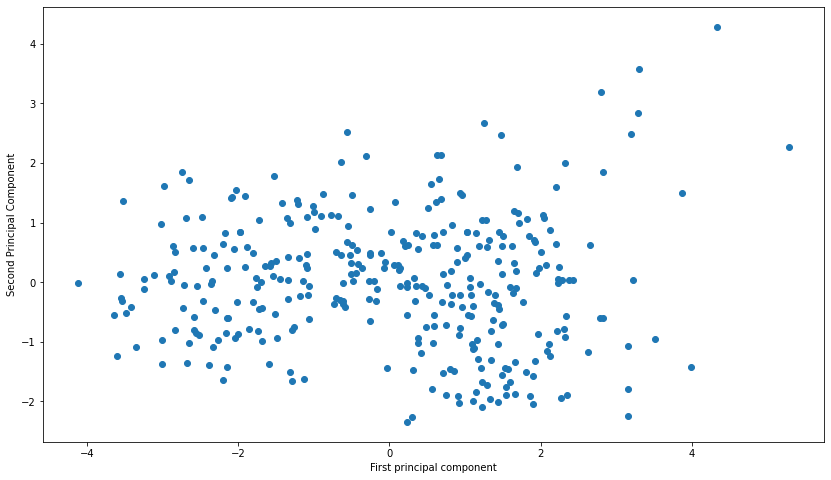

In [16]:
plt.figure(figsize=(14,8))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## ELBOW METHOD

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

C:\Users\DEll\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


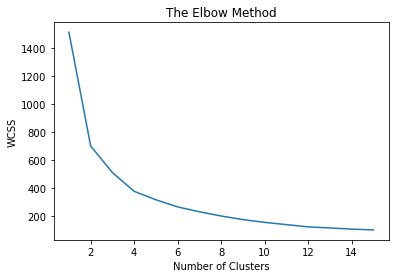

In [21]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,16):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=10)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,16),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## SILHOUETTE METHOD

In [23]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11]

For n_clusters = 2 The average silhouette_score is : 0.464547977240459
For n_clusters = 3 The average silhouette_score is : 0.40522840921488196
For n_clusters = 4 The average silhouette_score is : 0.38173564622664685
For n_clusters = 5 The average silhouette_score is : 0.36715564334157935
For n_clusters = 6 The average silhouette_score is : 0.3623640881299039
For n_clusters = 7 The average silhouette_score is : 0.3529282967924688
For n_clusters = 8 The average silhouette_score is : 0.3605114734422106
For n_clusters = 9 The average silhouette_score is : 0.3618660390135958
For n_clusters = 10 The average silhouette_score is : 0.3516081841703266
For n_clusters = 11 The average silhouette_score is : 0.35293920353163266


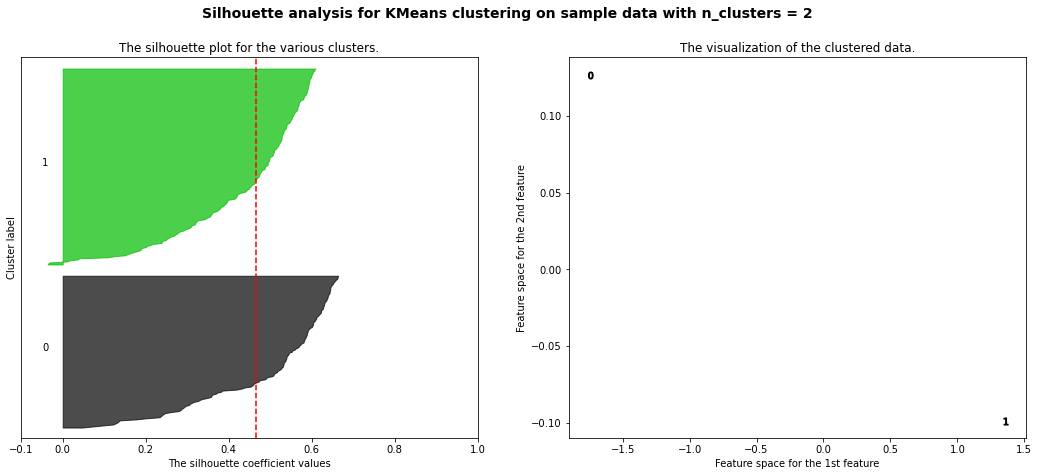

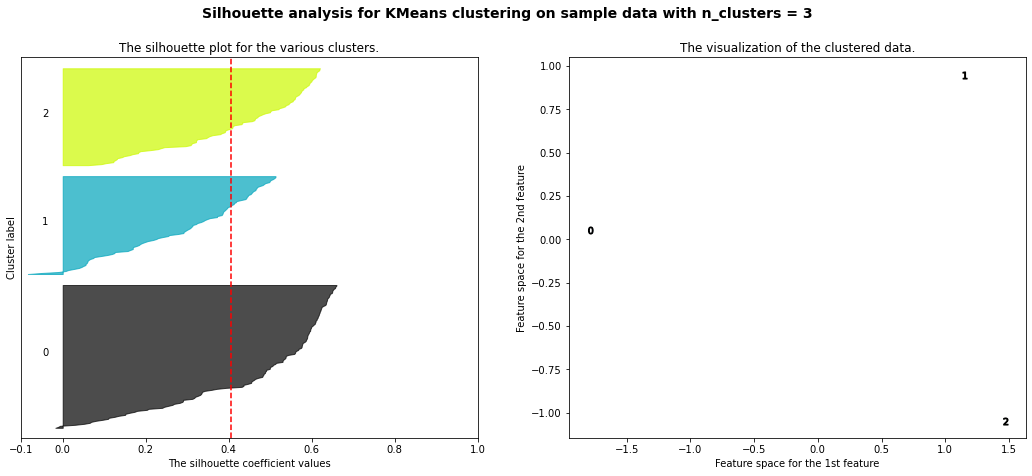

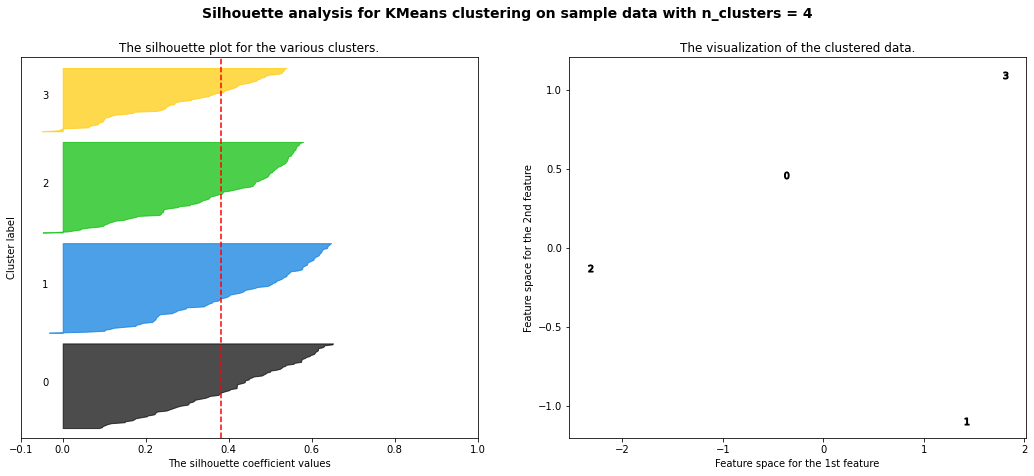

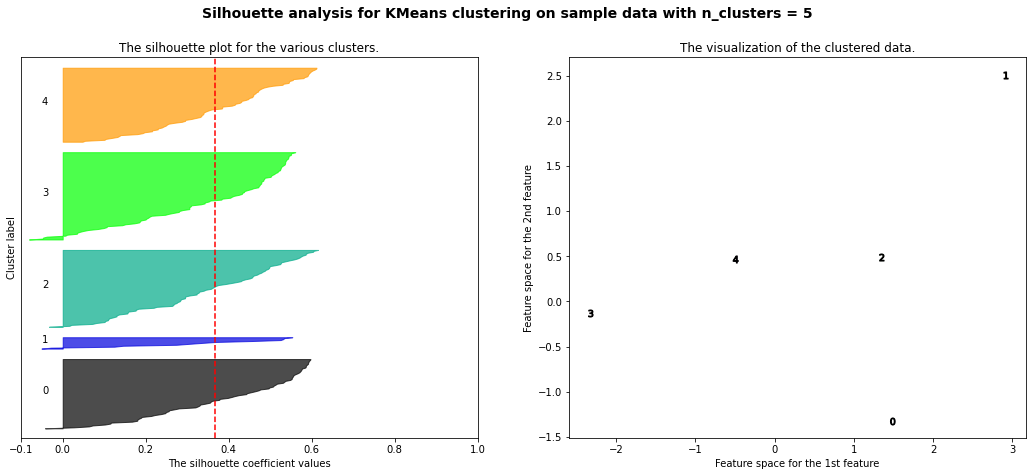

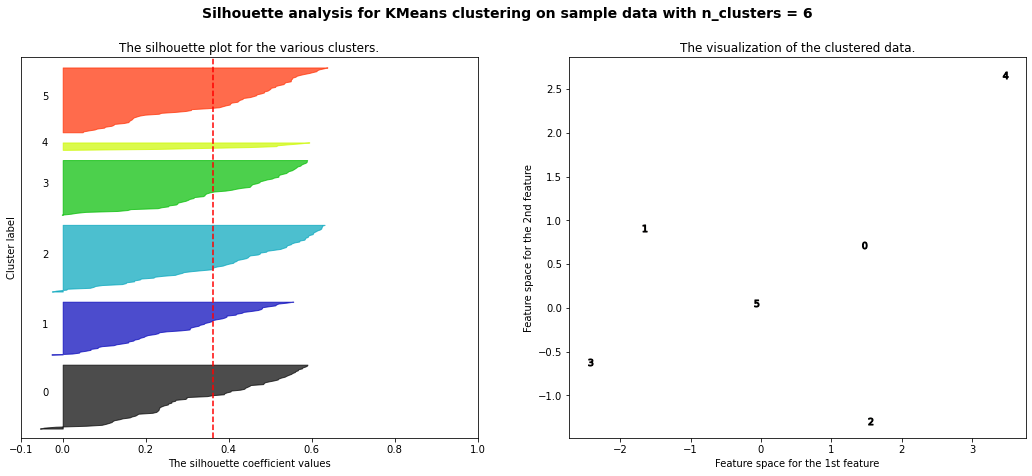

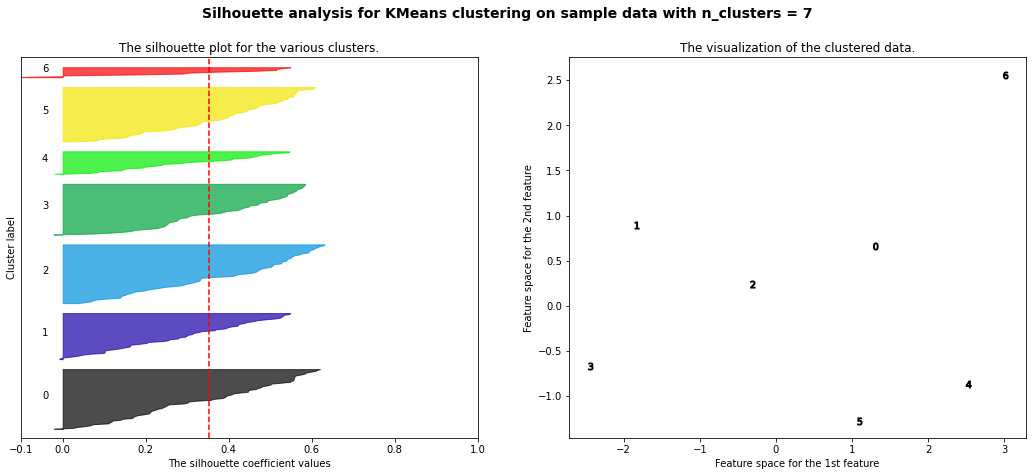

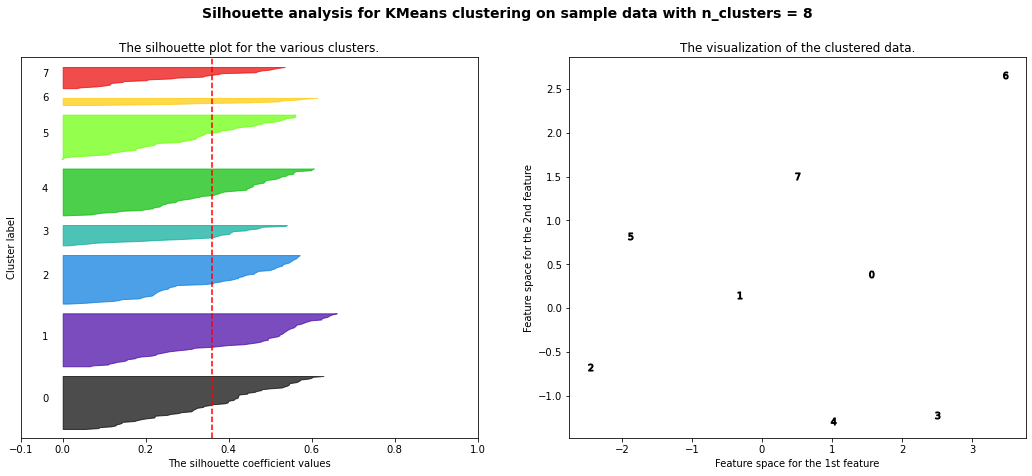

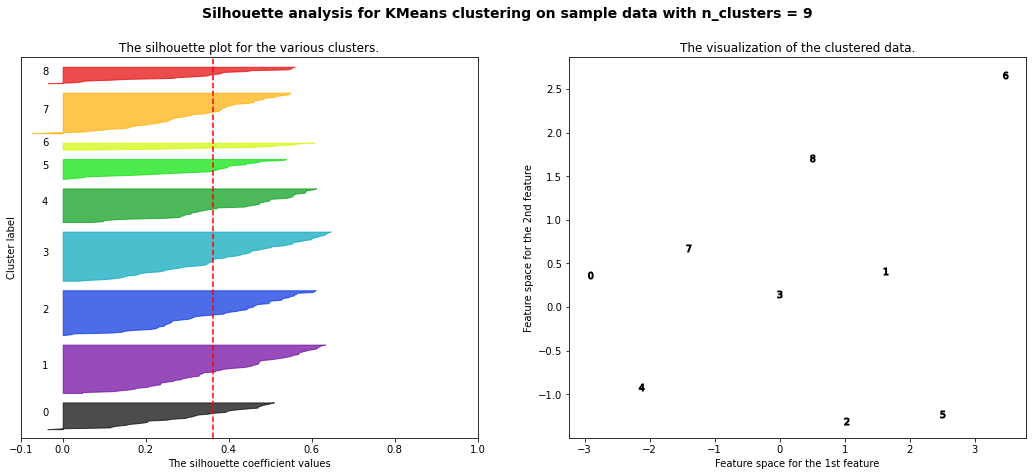

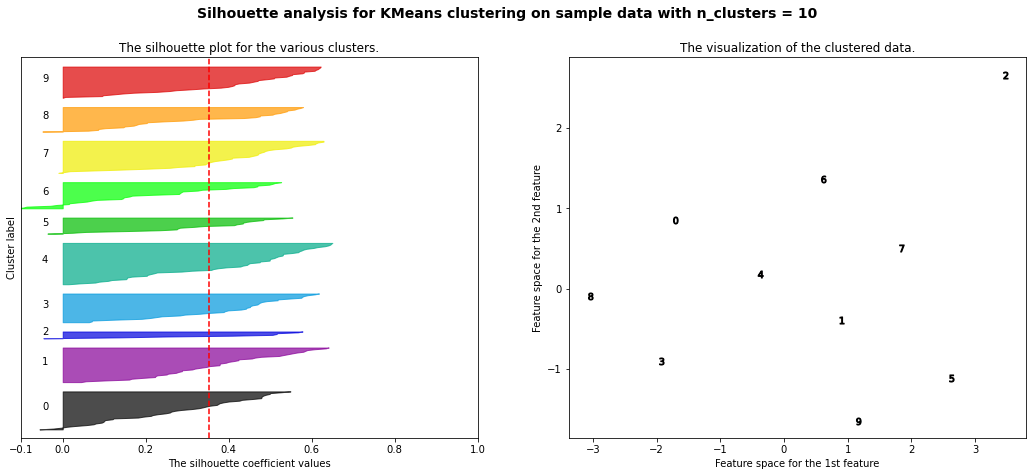

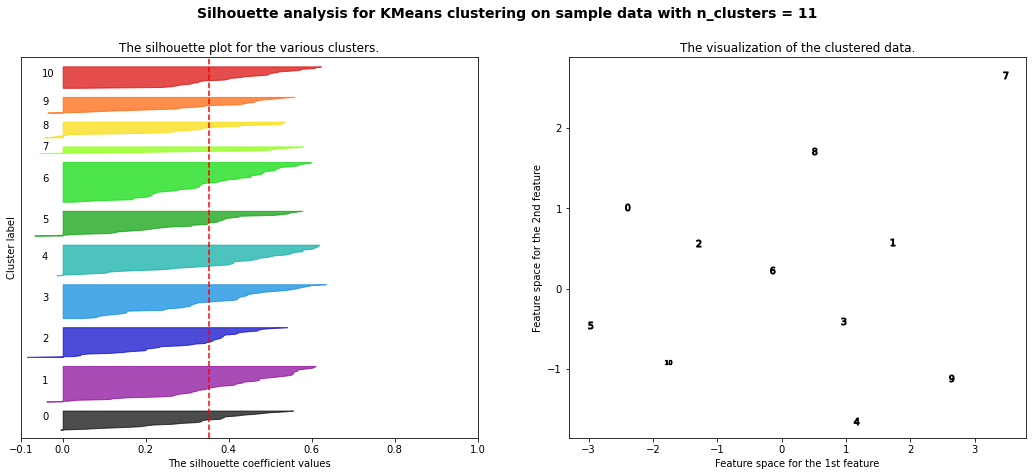

In [24]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(df[['tackles', 'interceptions', 'blocks', 'goals', 'assists',
     #  'KeyPasses']], df[['tackles', 'interceptions', 'blocks', 'goals', 'assists',
      # 'KeyPasses']], marker='.', s=30, lw=0, alpha=0.7,
       #         c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                #c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

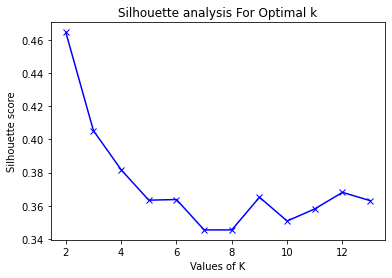

In [25]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(x_pca)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(x_pca, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [27]:
#x_pca.insert(df['Name'])
x_pca = pd.DataFrame(x_pca, columns = ['1st', '2nd'])


In [28]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(x_pca[['1st','2nd']])
print(cluster_labels)

[1 3 1 0 1 3 2 3 3 3 3 2 0 0 2 1 3 3 3 1 3 1 0 0 0 2 0 2 3 1 2 1 1 2 1 1 2
 1 2 0 1 2 2 3 2 1 2 0 0 2 2 2 1 2 0 2 2 0 1 2 2 1 0 3 3 1 0 0 2 2 3 2 1 1
 2 1 1 2 1 1 1 3 0 3 1 0 3 3 0 2 2 2 2 3 2 0 0 0 0 3 0 0 1 3 0 2 1 2 2 2 2
 0 1 2 1 2 2 2 1 0 2 1 1 0 3 0 0 2 0 1 2 1 3 0 2 0 0 1 3 1 3 3 0 1 2 0 0 2
 2 1 1 1 0 1 3 3 0 3 2 3 0 2 0 2 2 2 2 2 2 0 0 0 1 1 2 0 2 1 2 0 1 0 2 2 2
 2 2 2 0 2 2 0 0 1 2 0 1 1 2 3 1 2 0 0 1 3 2 3 3 3 3 1 1 3 1 2 1 3 2 1 2 2
 1 1 0 0 0 3 2 2 1 3 0 1 3 1 0 0 2 1 2 3 1 0 2 2 1 3 1 1 3 1 1 3 3 2 0 0 0
 2 0 0 0 0 0 0 2 2 1 1 2 0 2 1 1 3 1 3 3 1 1 3 3 1 1 0 2 1 0 1 0 2 0 1 1 0
 3 0 3 0 3 1 1 0 0 0 1 3 0 3 0 1 3 1 3 2 2 1 3 1 0 1 3 1 2 3 0 1 0 0 3 0 2
 2 3 2 0 3 3 1 1]


In [29]:
x_pca['Name'] = df['Name']
x_pca

,1st,2nd,Name
0,3.159189,-2.238019,Robert Lewandowski
1,3.862578,1.492920,Jadon Sancho
2,3.509022,-0.959012,Timo Werner
3,-0.676921,1.105036,Alphonso Davies
4,0.938858,-0.218550,Marco Reus
...,...,...,...
336,-0.978880,0.893944,Marten de Roon
337,1.437136,0.363150,Seko Fofana
338,1.492341,0.140263,Riccardo Orsolini
339,0.744642,-0.711942,Alex Berenguer


In [33]:
# Plot the data
plt.scatter(x_pca[:,0], 
            x_pca[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [30]:
import matplotlib.pyplot as plt
plt.scatter(x_pca.1st, x_pca.2nd, c=x_pca.Name, alpha = 0.6, s=10)

SyntaxError: invalid syntax (<ipython-input-30-0167d1d8f481>, line 2)

In [34]:
x_pca['cluster']= cluster_labels
x_pca.head()

,1st,2nd,Name,cluster
0,3.159189,-2.238019,Robert Lewandowski,1
1,3.862578,1.492920,Jadon Sancho,3
2,3.509022,-0.959012,Timo Werner,1
3,-0.676921,1.105036,Alphonso Davies,0
4,0.938858,-0.218550,Marco Reus,1


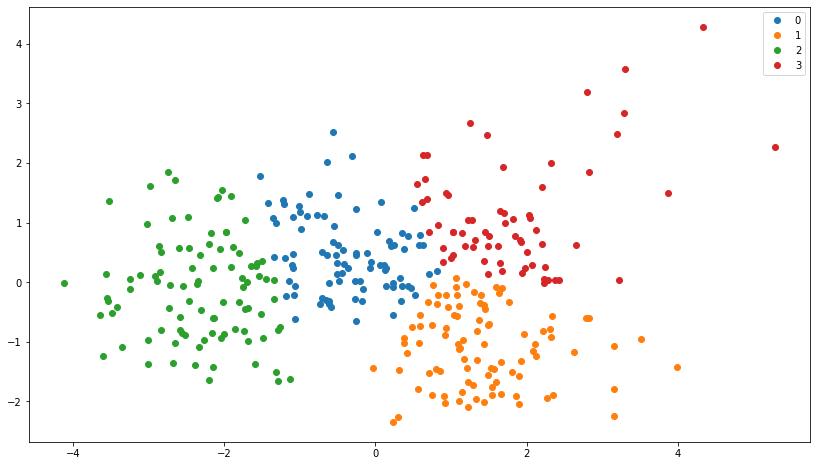

In [48]:
import mplcursors
plt.figure(figsize=(14,8))
groups = x_pca.groupby("cluster")
for name, group in groups:
    plt.plot(group["1st"], group["2nd"], marker="o", linestyle="", label=name)
mplcursors.cursor(hover=True)    
plt.legend()


In [43]:
first = x_pca[x_pca['cluster']==0]
first['Name']

3          Alphonso Davies
12       Raphael Guerreiro
13           Achraf Hakimi
22         Benjamin Pavard
23           Leon Goretzka
              ...         
326           Ashley Young
328    Gaetano Castrovilli
329          Mario Pasalic
331    Roberto Gagliardini
336         Marten de Roon
Name: Name, Length: 88, dtype: object

In [44]:
second = x_pca[x_pca['cluster']==1]
second['Name']

0      Robert Lewandowski
2             Timo Werner
4              Marco Reus
15          Marcus Thuram
19      Philippe Coutinho
              ...        
321         Franck Ribéry
323        Gastón Ramírez
327           Luis Muriel
339        Alex Berenguer
340       Arkadiusz Milik
Name: Name, Length: 93, dtype: object

In [45]:
third = x_pca[x_pca['cluster']==2]
third['Name']

6                  Thiago
11            Kevin Mbabu
14            Suat Serdar
25          Denis Zakaria
27        Ramy Bensebaini
              ...        
316           Diego Godín
324    José Luis Palomino
332        Stefan de Vrij
333                Bremer
335        Berat Djimsiti
Name: Name, Length: 94, dtype: object

In [46]:
fourth = x_pca[x_pca['cluster']==3]
fourth['Name']

1           Jadon Sancho
5           Serge Gnabry
7          Thomas Müller
8           Filip Kostic
9         Joshua Kimmich
             ...        
325        Dries Mertens
330       Alexis Sánchez
334      Roberto Soriano
337          Seko Fofana
338    Riccardo Orsolini
Name: Name, Length: 66, dtype: object

In [49]:
x_pca.to_excel(r'Football player clusters.xlsx', index = False)

In [50]:
from IPython.display import FileLink
FileLink('Football player clusters.xlsx')

C:\Users\DEll\Football player clusters.xlsx